In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

from netCDF4 import Dataset

In [7]:
datadir = "/home/ajdas/pace/restart_data/v1.0/"

fls = sorted([fl for fl in os.listdir(datadir)])

fIn = datadir + 'gfs_data.tile4.nc'
data = Dataset(fIn, 'r')

for key in data.variables.keys():
    #var = np.array(data[key])
    print(key)

lon
lat
ps
w
zh
sphum
o3mr
liq_wat
u_w
v_w
u_s
v_s


In [8]:
datadir = "/home/ajdas/pace/restart_data/v1.0/"

fls = sorted([fl for fl in os.listdir(datadir)])



#### fv_core.res.nc

Seems to include the vertical level index, as well as `ak` and `bk` (pretty sure these are used to calculate the vertical pressure levels.`)

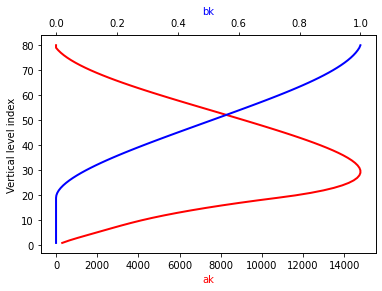

In [9]:
fIn = datadir + 'fv_core.res.nc'
data = Dataset(fIn, 'r')
xaxis_1 = np.array(data['xaxis_1']) # level index
Time = np.array(data['Time']) # time [1]
ak = np.array(data['ak'])
bk = np.array(data['bk'])
data.close()

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ak[0], xaxis_1, c='r', lw=2, label='ak')

ax2 = ax.twiny()
ax2.plot(bk[0], xaxis_1, c='b', lw=2, label='bk')

ax.set_ylabel('Vertical level index')
ax.set_xlabel('ak', color='r')
ax2.set_xlabel('bk', color='b')

plt.show()

#### fv_core.res.tile1.nc



In [10]:
fIn = datadir + 'fv_core.res.tile4.nc'
data = Dataset(fIn, 'r')

for key in data.variables.keys():
    #var = np.array(data[key])
    print(key)
    # print(key, var.shape)
    # print(key, np.transpose(var).shape)
# xaxis_1 = np.array(data['xaxis_1']) # x pts unstaggered
# xaxis_2 = np.array(data['xaxis_2']) # x pts staggered
# Time = np.array(data['Time']) # time [1]
# ak = np.array(data['ak'])
# bk = np.array(data['bk'])
# data.close()
#var = np.array(data["u"])



xaxis_1
xaxis_2
yaxis_1
yaxis_2
zaxis_1
Time
u
v
W
DZ
T
delp
phis


In [46]:
import xarray as xr
import zarr

baroclinic_c12_output = '/home/ajdas/pace/output.zarr/'

ds = xr.open_zarr(store=zarr.DirectoryStore(path=baroclinic_c12_output), consolidated=False)
# u_init = ds['u'].isel(time=-1).values
# v_init = ds['v'].isel(time=-1).values
# q_init = ds['qvapor'].isel(time=-1).values
# p_init = ds['delp'].isel(time=-1).values

u = ds['u'].values


In [47]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [48]:
u.shape

(4, 6, 12, 13, 79)

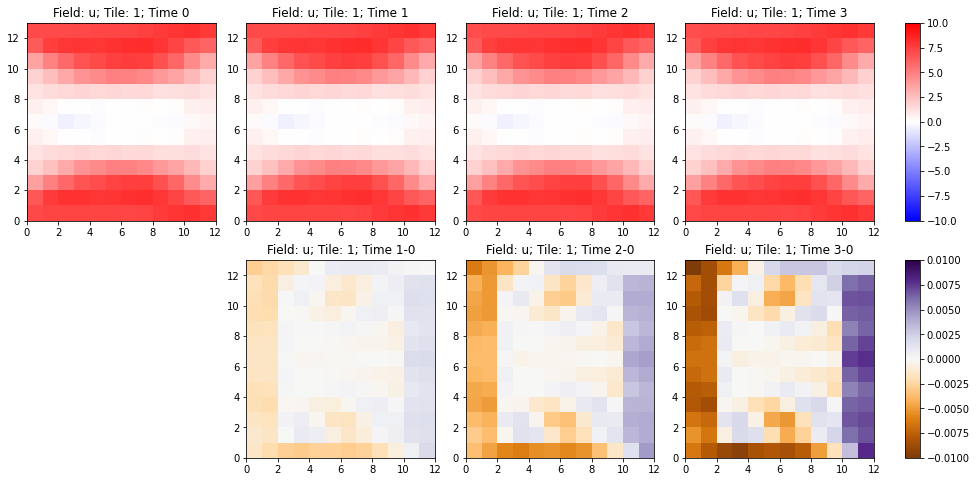

In [49]:
tile = 0
vval = 10

fig = plt.figure(figsize = (16, 8))
gs = GridSpec(2, 5, width_ratios=[1,1,1,1,.08])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

cax1 = fig.add_subplot(gs[0, 4])
cax2 = fig.add_subplot(gs[1, 4])

f1 = ax1.pcolormesh(u[0, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax2.pcolormesh(u[1, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax3.pcolormesh(u[2, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax4.pcolormesh(u[3, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)

f2 = ax5.pcolormesh((u[1, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax6.pcolormesh((u[2, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax7.pcolormesh((u[3, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)

plt.colorbar(f1, cax=cax1)
plt.colorbar(f2, cax=cax2)

ax1.set_title("Field: u; Tile: %s; Time 0" % (tile+1))
ax2.set_title("Field: u; Tile: %s; Time 1" % (tile+1))
ax3.set_title("Field: u; Tile: %s; Time 2" % (tile+1))
ax4.set_title("Field: u; Tile: %s; Time 3" % (tile+1))

ax5.set_title("Field: u; Tile: %s; Time 1-0" % (tile+1))
ax6.set_title("Field: u; Tile: %s; Time 2-0" % (tile+1))
ax7.set_title("Field: u; Tile: %s; Time 3-0" % (tile+1))

plt.show()

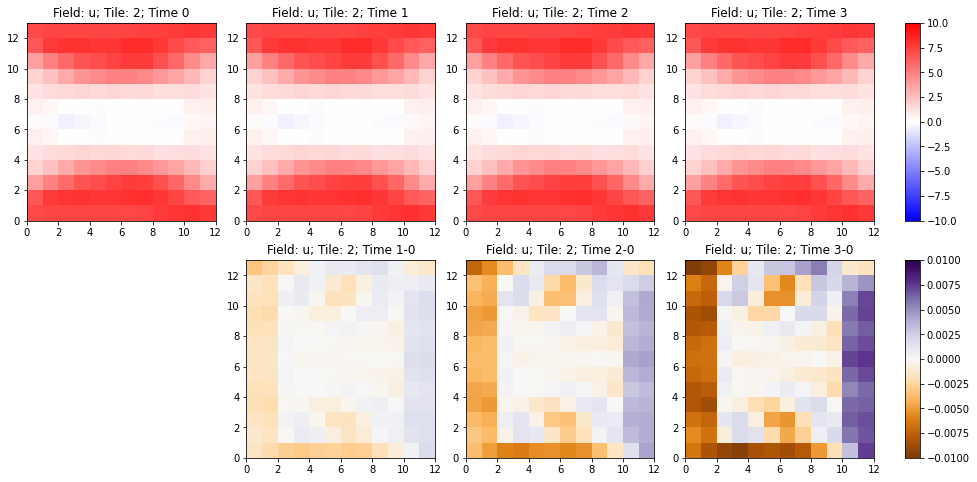

In [50]:
tile = 1
vval = 10

fig = plt.figure(figsize = (16, 8))
gs = GridSpec(2, 5, width_ratios=[1,1,1,1,.08])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

cax1 = fig.add_subplot(gs[0, 4])
cax2 = fig.add_subplot(gs[1, 4])

f1 = ax1.pcolormesh(u[0, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax2.pcolormesh(u[1, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax3.pcolormesh(u[2, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax4.pcolormesh(u[3, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)

f2 = ax5.pcolormesh((u[1, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax6.pcolormesh((u[2, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax7.pcolormesh((u[3, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)

plt.colorbar(f1, cax=cax1)
plt.colorbar(f2, cax=cax2)

ax1.set_title("Field: u; Tile: %s; Time 0" % (tile+1))
ax2.set_title("Field: u; Tile: %s; Time 1" % (tile+1))
ax3.set_title("Field: u; Tile: %s; Time 2" % (tile+1))
ax4.set_title("Field: u; Tile: %s; Time 3" % (tile+1))

ax5.set_title("Field: u; Tile: %s; Time 1-0" % (tile+1))
ax6.set_title("Field: u; Tile: %s; Time 2-0" % (tile+1))
ax7.set_title("Field: u; Tile: %s; Time 3-0" % (tile+1))

plt.show()

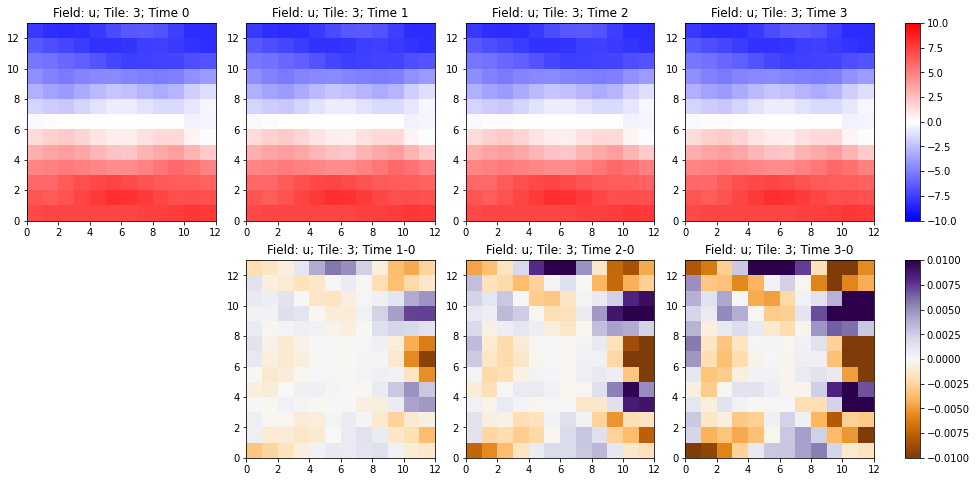

In [51]:
tile = 2
vval = 10

fig = plt.figure(figsize = (16, 8))
gs = GridSpec(2, 5, width_ratios=[1,1,1,1,.08])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

cax1 = fig.add_subplot(gs[0, 4])
cax2 = fig.add_subplot(gs[1, 4])

f1 = ax1.pcolormesh(u[0, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax2.pcolormesh(u[1, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax3.pcolormesh(u[2, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax4.pcolormesh(u[3, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)

f2 = ax5.pcolormesh((u[1, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax6.pcolormesh((u[2, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax7.pcolormesh((u[3, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)

plt.colorbar(f1, cax=cax1)
plt.colorbar(f2, cax=cax2)

ax1.set_title("Field: u; Tile: %s; Time 0" % (tile+1))
ax2.set_title("Field: u; Tile: %s; Time 1" % (tile+1))
ax3.set_title("Field: u; Tile: %s; Time 2" % (tile+1))
ax4.set_title("Field: u; Tile: %s; Time 3" % (tile+1))

ax5.set_title("Field: u; Tile: %s; Time 1-0" % (tile+1))
ax6.set_title("Field: u; Tile: %s; Time 2-0" % (tile+1))
ax7.set_title("Field: u; Tile: %s; Time 3-0" % (tile+1))

plt.show()

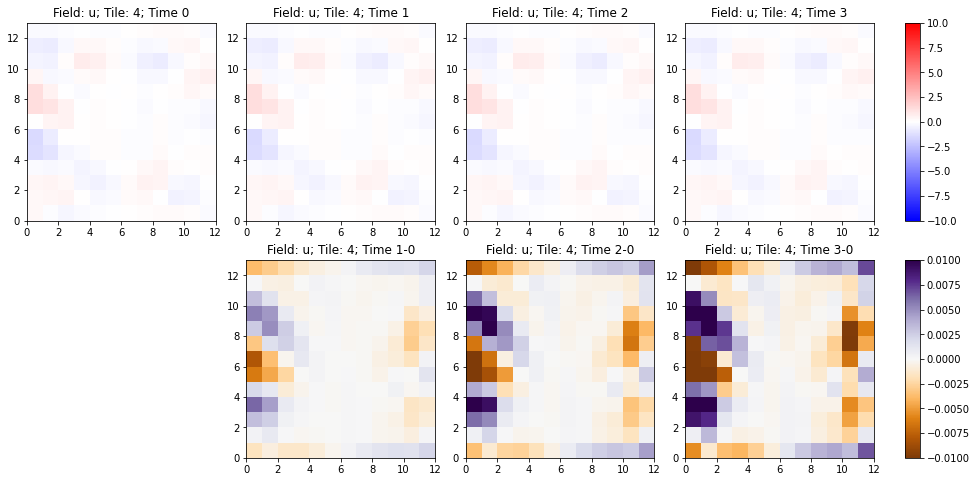

In [52]:
tile = 3
vval = 10

fig = plt.figure(figsize = (16, 8))
gs = GridSpec(2, 5, width_ratios=[1,1,1,1,.08])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

cax1 = fig.add_subplot(gs[0, 4])
cax2 = fig.add_subplot(gs[1, 4])

f1 = ax1.pcolormesh(u[0, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax2.pcolormesh(u[1, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax3.pcolormesh(u[2, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax4.pcolormesh(u[3, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)

f2 = ax5.pcolormesh((u[1, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax6.pcolormesh((u[2, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax7.pcolormesh((u[3, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)

plt.colorbar(f1, cax=cax1)
plt.colorbar(f2, cax=cax2)

ax1.set_title("Field: u; Tile: %s; Time 0" % (tile+1))
ax2.set_title("Field: u; Tile: %s; Time 1" % (tile+1))
ax3.set_title("Field: u; Tile: %s; Time 2" % (tile+1))
ax4.set_title("Field: u; Tile: %s; Time 3" % (tile+1))

ax5.set_title("Field: u; Tile: %s; Time 1-0" % (tile+1))
ax6.set_title("Field: u; Tile: %s; Time 2-0" % (tile+1))
ax7.set_title("Field: u; Tile: %s; Time 3-0" % (tile+1))

plt.show()

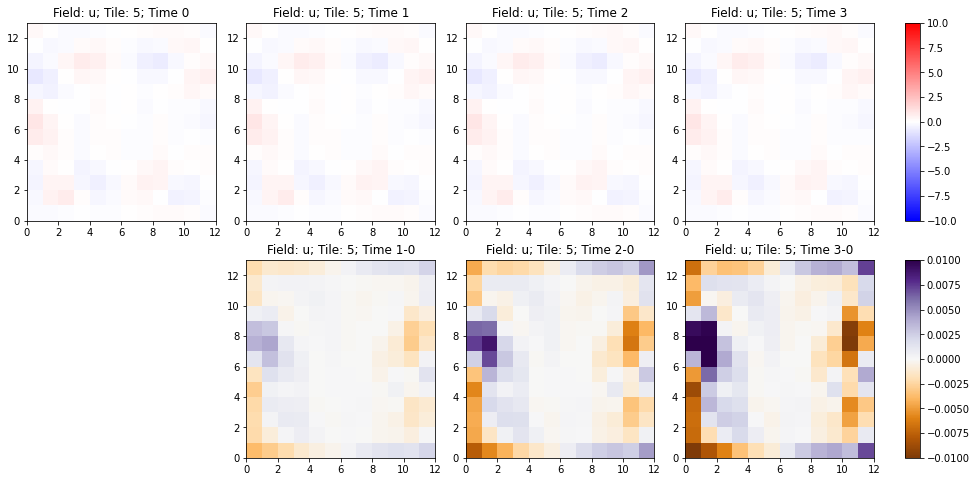

In [53]:
tile = 4
vval = 10

fig = plt.figure(figsize = (16, 8))
gs = GridSpec(2, 5, width_ratios=[1,1,1,1,.08])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

cax1 = fig.add_subplot(gs[0, 4])
cax2 = fig.add_subplot(gs[1, 4])

f1 = ax1.pcolormesh(u[0, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax2.pcolormesh(u[1, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax3.pcolormesh(u[2, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax4.pcolormesh(u[3, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)

f2 = ax5.pcolormesh((u[1, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax6.pcolormesh((u[2, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax7.pcolormesh((u[3, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)

plt.colorbar(f1, cax=cax1)
plt.colorbar(f2, cax=cax2)

ax1.set_title("Field: u; Tile: %s; Time 0" % (tile+1))
ax2.set_title("Field: u; Tile: %s; Time 1" % (tile+1))
ax3.set_title("Field: u; Tile: %s; Time 2" % (tile+1))
ax4.set_title("Field: u; Tile: %s; Time 3" % (tile+1))

ax5.set_title("Field: u; Tile: %s; Time 1-0" % (tile+1))
ax6.set_title("Field: u; Tile: %s; Time 2-0" % (tile+1))
ax7.set_title("Field: u; Tile: %s; Time 3-0" % (tile+1))

plt.show()

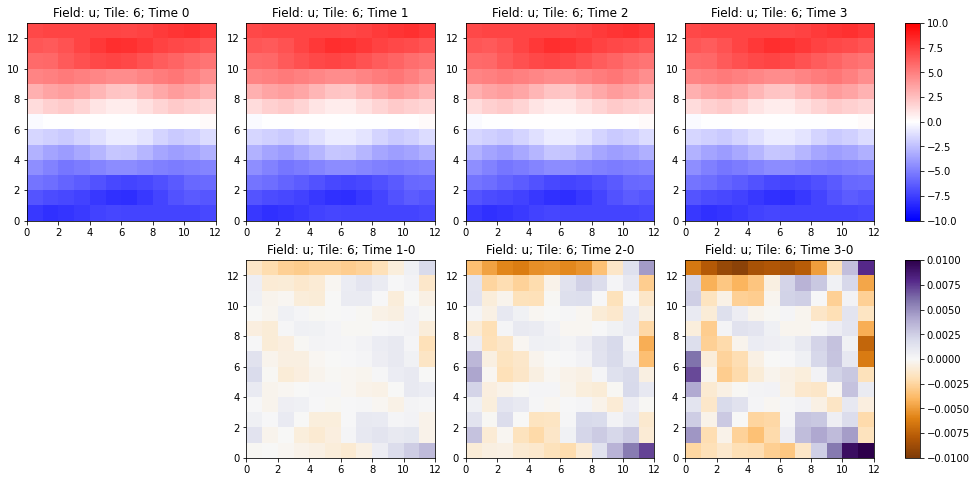

In [54]:
tile = 5
vval = 10

fig = plt.figure(figsize = (16, 8))
gs = GridSpec(2, 5, width_ratios=[1,1,1,1,.08])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])

ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[1, 3])

cax1 = fig.add_subplot(gs[0, 4])
cax2 = fig.add_subplot(gs[1, 4])

f1 = ax1.pcolormesh(u[0, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax2.pcolormesh(u[1, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax3.pcolormesh(u[2, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)
ax4.pcolormesh(u[3, tile, :, :, -1].T, cmap='bwr', vmin=-vval, vmax=vval)

f2 = ax5.pcolormesh((u[1, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax6.pcolormesh((u[2, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)
ax7.pcolormesh((u[3, tile, :, :, -1] - u[0, tile, :, :, -1]).T, cmap="PuOr", vmin=-1e-2, vmax=1e-2)

plt.colorbar(f1, cax=cax1)
plt.colorbar(f2, cax=cax2)

ax1.set_title("Field: u; Tile: %s; Time 0" % (tile+1))
ax2.set_title("Field: u; Tile: %s; Time 1" % (tile+1))
ax3.set_title("Field: u; Tile: %s; Time 2" % (tile+1))
ax4.set_title("Field: u; Tile: %s; Time 3" % (tile+1))

ax5.set_title("Field: u; Tile: %s; Time 1-0" % (tile+1))
ax6.set_title("Field: u; Tile: %s; Time 2-0" % (tile+1))
ax7.set_title("Field: u; Tile: %s; Time 3-0" % (tile+1))

plt.show()